In [1]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# create set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
#add latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
# use citipy module to determine city based on latitude and longitude
from citipy import citipy

In [5]:
# import datetime module from datetime library
from datetime import datetime

# import requests library
import requests

# import API key
from config import weather_api_key

In [6]:
# starting URL for Weather Map API call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8bce802f60bc75d38652850bc2d5b16d


In [10]:
#create a list for holding cities
cities = []

# identify nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # if city is unique add to cities list
    if city not in cities:
        cities.append(city)

#print city count to confirm sufficient count
len(cities)

609

In [11]:
# create an empty list to hold weather data
city_data = []

# print beginning of the log session
print("Beginning of Data Retrieval        ")
print("-----------------------------------")

# create counters
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning of Data Retrieval        
-----------------------------------
Processing Record 1 of Set 1 | tasiilaq
Processing Record 2 of Set 1 | cape town
Processing Record 3 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 4 of Set 1 | hilo
Processing Record 5 of Set 1 | mazatlan
Processing Record 6 of Set 1 | chokurdakh
Processing Record 7 of Set 1 | castro
Processing Record 8 of Set 1 | chuy
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | dubrovka
Processing Record 11 of Set 1 | mahebourg
Processing Record 12 of Set 1 | port alfred
Processing Record 13 of Set 1 | khatanga
Processing Record 14 of Set 1 | cidreira
Processing Record 15 of Set 1 | georgetown
Processing Record 16 of Set 1 | camana
Processing Record 17 of Set 1 | thompson
Processing Record 18 of Set 1 | kamuli
Processing Record 19 of Set 1 | upernavik
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 | half moon bay
Processing Record 22 of Set 1 | sao jose da

Processing Record 37 of Set 4 | sabirabad
Processing Record 38 of Set 4 | zambezi
Processing Record 39 of Set 4 | miri
Processing Record 40 of Set 4 | tevriz
Processing Record 41 of Set 4 | rocha
Processing Record 42 of Set 4 | aksehir
Processing Record 43 of Set 4 | mayo
Processing Record 44 of Set 4 | leshukonskoye
Processing Record 45 of Set 4 | praya
Processing Record 46 of Set 4 | muros
Processing Record 47 of Set 4 | los llanos de aridane
Processing Record 48 of Set 4 | carlsbad
Processing Record 49 of Set 4 | araouane
Processing Record 50 of Set 4 | keetmanshoop
Processing Record 1 of Set 5 | crotone
Processing Record 2 of Set 5 | cozumel
Processing Record 3 of Set 5 | kabansk
Processing Record 4 of Set 5 | maghama
City not found. Skipping...
Processing Record 5 of Set 5 | kamenka
Processing Record 6 of Set 5 | birjand
Processing Record 7 of Set 5 | kollumerland
City not found. Skipping...
Processing Record 8 of Set 5 | komsomolskiy
Processing Record 9 of Set 5 | osorno
Processi

Processing Record 27 of Set 8 | sanchursk
Processing Record 28 of Set 8 | saint anthony
Processing Record 29 of Set 8 | itamarandiba
Processing Record 30 of Set 8 | tatawin
Processing Record 31 of Set 8 | vostok
Processing Record 32 of Set 8 | siverskiy
Processing Record 33 of Set 8 | sola
Processing Record 34 of Set 8 | grand gaube
Processing Record 35 of Set 8 | krasnoselkup
Processing Record 36 of Set 8 | lompoc
Processing Record 37 of Set 8 | basco
Processing Record 38 of Set 8 | vershino-darasunskiy
Processing Record 39 of Set 8 | kaabong
Processing Record 40 of Set 8 | marabba
Processing Record 41 of Set 8 | mumford
Processing Record 42 of Set 8 | lata
Processing Record 43 of Set 8 | ube
Processing Record 44 of Set 8 | leningradskiy
Processing Record 45 of Set 8 | aksu
Processing Record 46 of Set 8 | vrakhation
Processing Record 47 of Set 8 | ranot
Processing Record 48 of Set 8 | cuamba
Processing Record 49 of Set 8 | salalah
Processing Record 50 of Set 8 | te anau
Processing Rec

Processing Record 21 of Set 12 | celestun
Processing Record 22 of Set 12 | saint-pierre
Processing Record 23 of Set 12 | geraldton
Processing Record 24 of Set 12 | buala
Processing Record 25 of Set 12 | morehead
Processing Record 26 of Set 12 | borujerd
Processing Record 27 of Set 12 | chapayeve
Processing Record 28 of Set 12 | bantou
Processing Record 29 of Set 12 | almaznyy
Processing Record 30 of Set 12 | bergen
Processing Record 31 of Set 12 | meadow lake
Processing Record 32 of Set 12 | kungsbacka
Processing Record 33 of Set 12 | kristiinankaupunki
Processing Record 34 of Set 12 | kisangani
Processing Record 35 of Set 12 | shache
Processing Record 36 of Set 12 | comodoro rivadavia
Processing Record 37 of Set 12 | moelv
Processing Record 38 of Set 12 | auch
Processing Record 39 of Set 12 | north bend
Processing Record 40 of Set 12 | clarence town
Processing Record 41 of Set 12 | shibarghan
City not found. Skipping...
Processing Record 42 of Set 12 | el badari
City not found. Skippi

In [12]:
# convert array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tasiilaq,65.6145,-37.6368,30.92,85,98,7.07,GL,2021-09-25 00:40:20
1,Cape Town,-33.9258,18.4232,55.27,90,0,1.14,ZA,2021-09-25 00:37:35
2,Hilo,19.7297,-155.0900,79.79,85,90,13.80,US,2021-09-25 00:40:37
3,Mazatlan,23.2167,-106.4167,85.96,74,20,9.22,MX,2021-09-25 00:40:27
4,Chokurdakh,70.6333,147.9167,33.75,75,100,15.30,RU,2021-09-25 00:41:39
5,Castro,-24.7911,-50.0119,59.88,80,83,5.99,BR,2021-09-25 00:41:39
6,Chuy,-33.6971,-53.4616,54.95,97,17,6.78,UY,2021-09-25 00:41:40
7,Rikitea,-23.1203,-134.9692,73.62,80,100,18.54,PF,2021-09-25 00:40:23
8,Dubrovka,53.6907,33.5071,46.38,97,94,4.59,RU,2021-09-25 00:41:40
9,Mahebourg,-20.4081,57.7000,70.25,88,75,17.27,MU,2021-09-25 00:41:40


In [13]:
# create output file (CSV)
output_data_file = "weather_data/cities.csv"

#export city_data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# extract relevant fields from DF for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

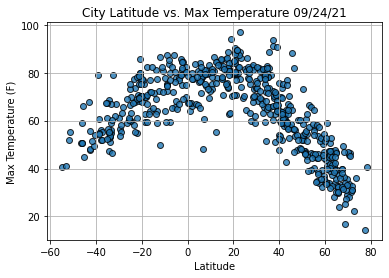

In [15]:
# import time module
import time


# build scatter plot for latitude vs. max temperature
plt. scatter(lats, max_temps, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# incorporate other graph properties
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# save the figure
plt.savefig("weather_data/Fig1.png")

# show the plot
plt.show()

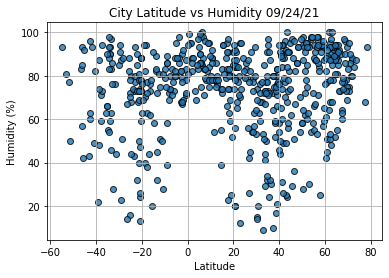

In [17]:
# build the scatter plots for latitude vs humidity
plt.scatter(lats, humidity, edgecolor = "black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# incorporate other graph properties
plt.title(f"City Latitude vs Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# save figure
plt.savefig("weather_data/Fig2.png")

# show the plot
plt.show()

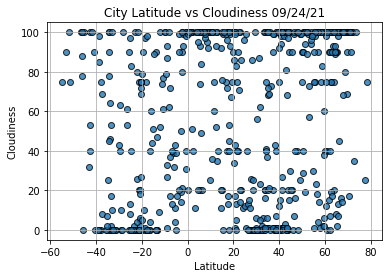

In [18]:
# build scatter plots for latitude vs cloudiness
plt.scatter(lats, cloudiness, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# incorporate other graph properties
plt.title(f"City Latitude vs Cloudiness " + time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# save figure
plt.savefig("weather_data/Fig3.png")

# show plot
plt.show()

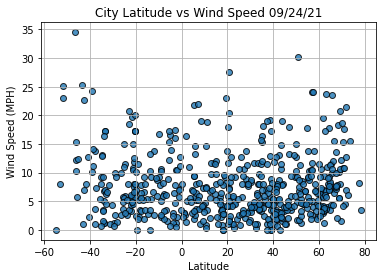

In [19]:
# build scatter plots for latitude vs wind speed
plt.scatter(lats, wind_speed, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# incorporate other graph properties
plt.title(f"City Latitude vs Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid(True)

# save figure
plt.savefig("weather_data/Fig4.png")

# show plot
plt.show()

In [22]:
# import linregress
from scipy.stats import linregress

# create function to create perform linear regression on weather data
# & plot regression line and equation with data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # calculate regression line y-values from slope and intercept 
    regress_values = x_values * slope + intercept
    
    # get equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # create scatter plot and plot regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    
    # annotate text for line equation
    plt.annotate(line_eq, text_coordinates, fontsize=16, color="red")
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()

In [23]:
index13 = city_data_df.loc[13]

In [24]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3       True
4       True
       ...  
560     True
561     True
562     True
563     True
564     True
Name: Lat, Length: 565, dtype: bool

In [25]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tasiilaq,65.6145,-37.6368,30.92,85,98,7.07,GL,2021-09-25 00:40:20
2,Hilo,19.7297,-155.0900,79.79,85,90,13.80,US,2021-09-25 00:40:37
3,Mazatlan,23.2167,-106.4167,85.96,74,20,9.22,MX,2021-09-25 00:40:27
4,Chokurdakh,70.6333,147.9167,33.75,75,100,15.30,RU,2021-09-25 00:41:39
8,Dubrovka,53.6907,33.5071,46.38,97,94,4.59,RU,2021-09-25 00:41:40


In [26]:
# create northern and southern hemispheres DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

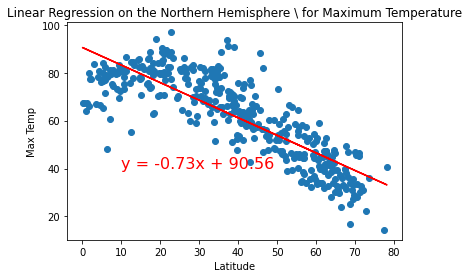

In [27]:
# linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# call function
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \ for Maximum Temperature", "Max Temp", (10,40))


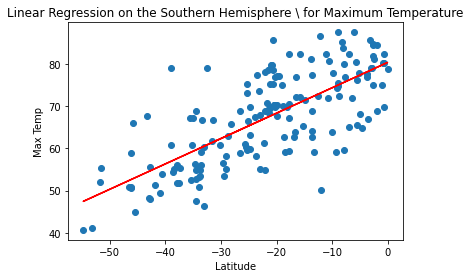

In [35]:
# linear regression on Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# call function
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \ for Maximum Temperature", "Max Temp", (40, 10))


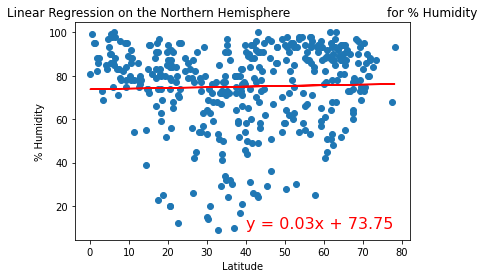

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

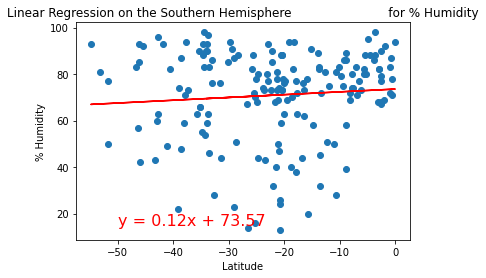

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

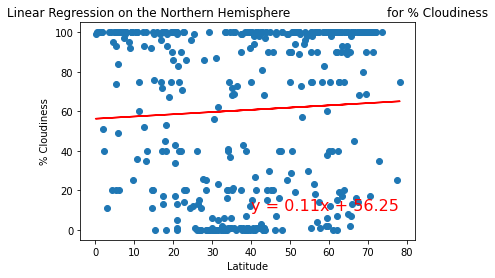

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

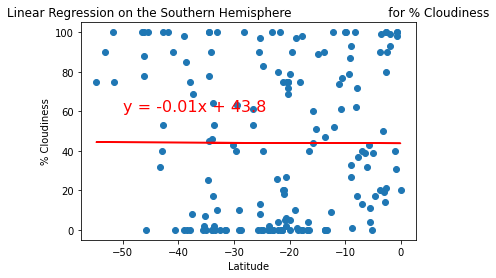

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))


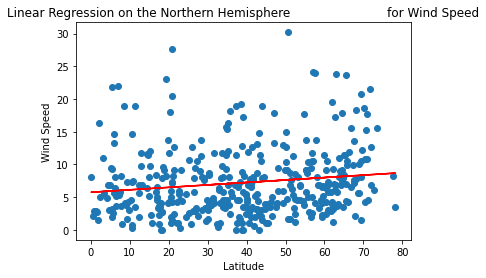

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

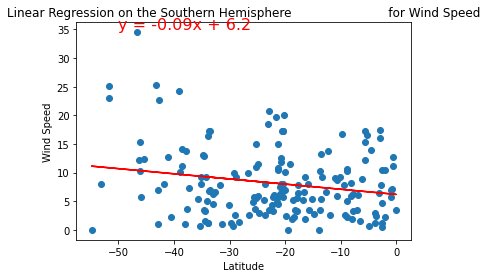

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))